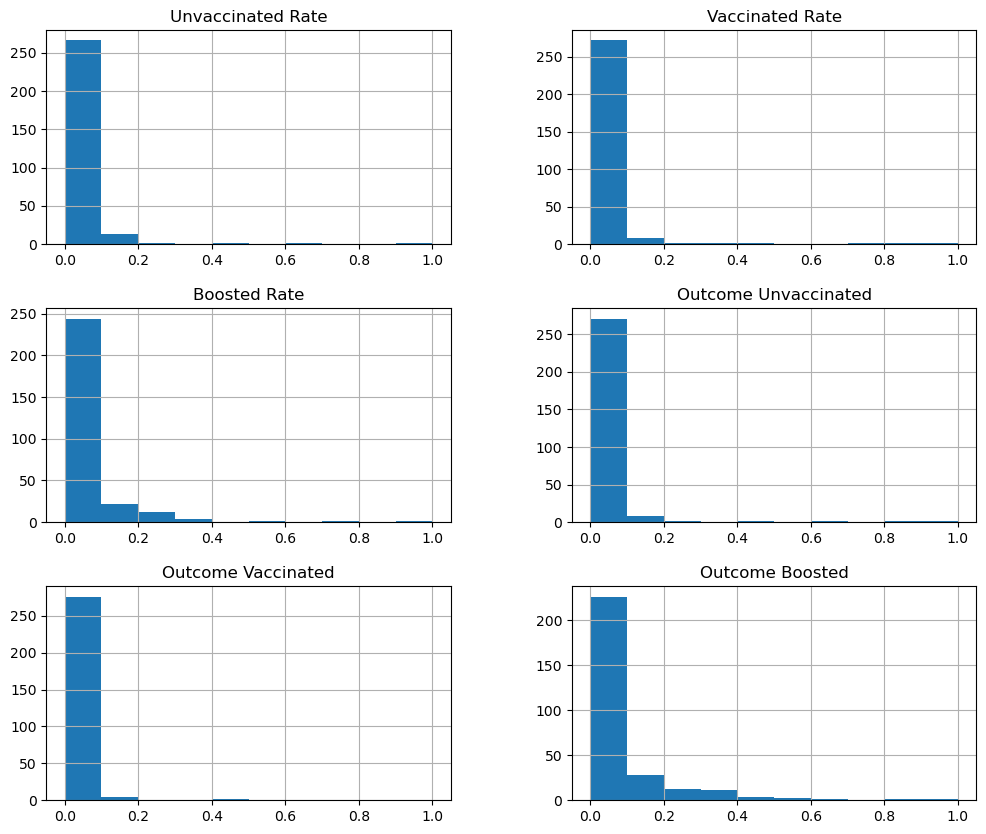

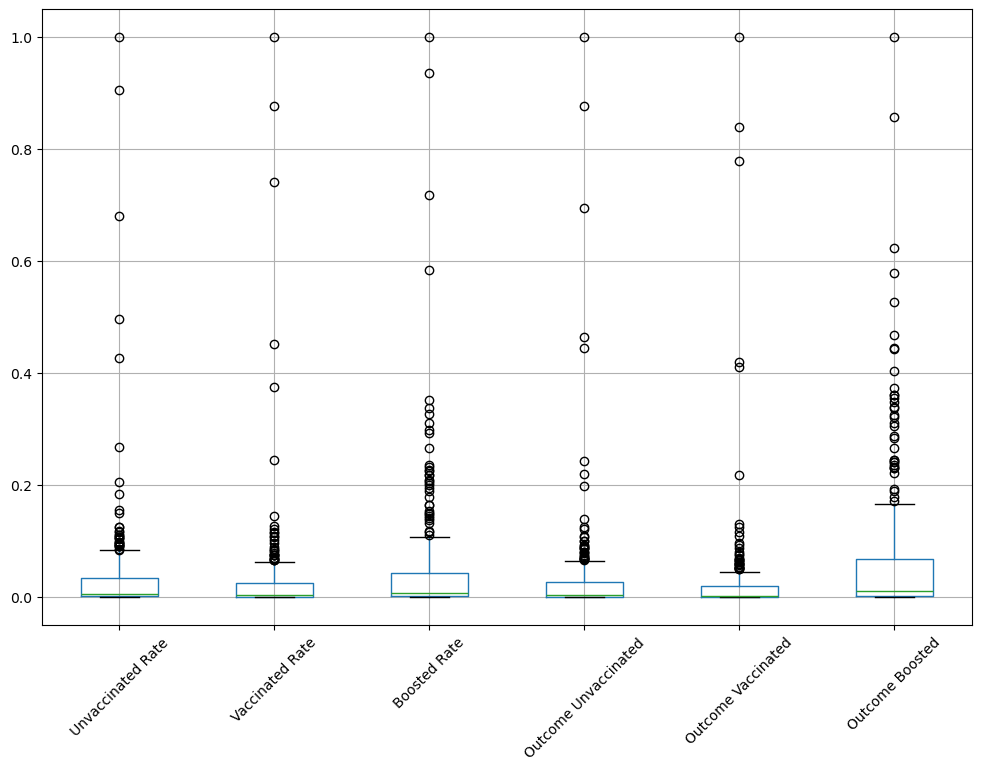

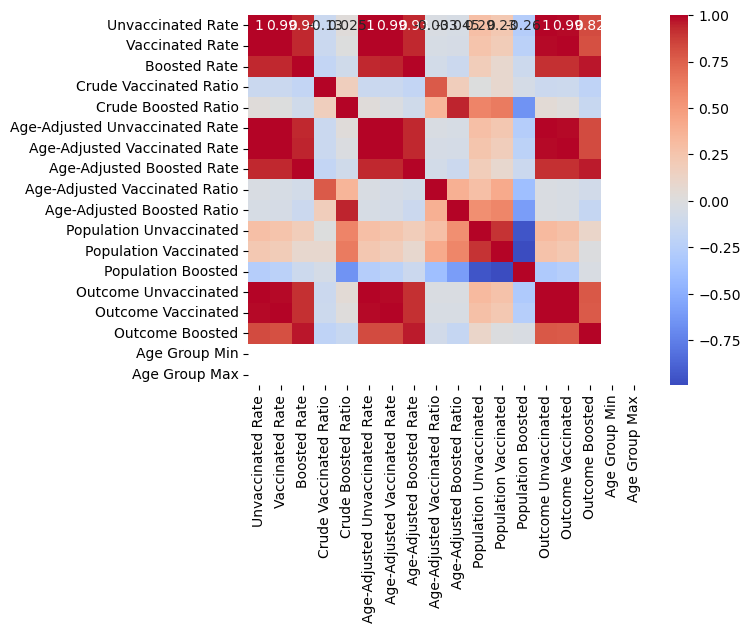

Descriptive Statistics:
       Unvaccinated Rate  Vaccinated Rate  Boosted Rate  \
count         286.000000       286.000000    286.000000   
mean            0.035790         0.029255      0.049886   
std             0.101263         0.098572      0.115318   
min             0.000000         0.000000      0.000000   
25%             0.001443         0.000722      0.001430   
50%             0.005364         0.003107      0.007174   
75%             0.034743         0.026179      0.044036   
max             1.000000         1.000000      1.000000   

       Crude Vaccinated Ratio  Crude Boosted Ratio  \
count              286.000000           286.000000   
mean                 2.303147             2.122727   
std                  1.583209             2.741892   
min                  0.000000             0.000000   
25%                  1.700000             1.100000   
50%                  2.000000             1.300000   
75%                  2.400000             1.800000   
max         

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, ttest_ind
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import statsmodels.api as sm

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
data = pd.read_csv("C:\\Users\\grays\\Downloads\\COVID-19_Outcomes_by_Vaccination_Status_-_Historical.csv")

# Convert all columns that should be numeric and handle errors
numeric_cols = ['Unvaccinated Rate', 'Vaccinated Rate', 'Boosted Rate', 'Outcome Unvaccinated', 'Outcome Vaccinated', 'Outcome Boosted']
data[numeric_cols] = data[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Drop any rows with NaN values in these columns after conversion
data.dropna(subset=numeric_cols, inplace=True)

# Replace infinite values with NaN and then drop those rows
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.dropna(inplace=True)

# Normalization with MinMaxScaler
scaler = MinMaxScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

# Descriptive Statistics
descriptive_stats = data.describe()

# Visualization: Histograms for numeric features
data[numeric_cols].hist(figsize=(12, 10))
plt.show()

# Box plots for numeric rates
data.boxplot(column=numeric_cols, figsize=(12, 8))
plt.xticks(rotation=45)
plt.show()

# Correlation matrix
correlation_matrix = data.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

# Prepare data for regression
X = sm.add_constant(data[['Vaccinated Rate', 'Boosted Rate']])  # Adding a constant to the model
y = data['Outcome Unvaccinated']  # Response variable

# Check if X or y contain any NaN or infinite values
if np.isfinite(X).all().all() and np.isfinite(y).all():
    # Regression Analysis
    model = sm.OLS(y, X).fit()
    regression_summary = model.summary()
else:
    regression_summary = "Data contains non-finite values"

# Predictive Modeling
X = data[['Unvaccinated Rate', 'Vaccinated Rate', 'Boosted Rate']]
y = data['Outcome Unvaccinated'].apply(lambda x: 1 if x > 0 else 0)  # Assuming binary outcome for demonstration
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

# Output the relevant results
print("Descriptive Statistics:")
print(descriptive_stats)

print("\nRegression Analysis Summary:")
print(regression_summary)

print("\nRandom Forest Model Accuracy:")
print(accuracy)
